In [1]:
import cmocean.cm as cm
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [3]:
kk = np.array([0.74711466, 3.54136997, 0.37895037, 7.19318921, 0.42550747])

In [4]:
def growth(k, pH, co2):
    mm = co2/(k[1] + co2)
    tt = k[0] * (1 + k[2] * (1 + np.tanh((pH - k[3]) / k[4])))
    return mm * tt, mm, tt

In [5]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

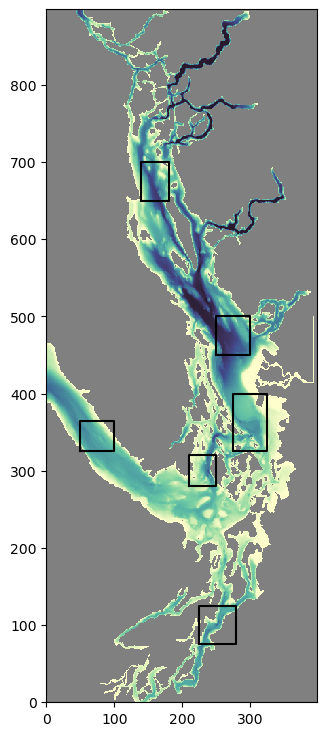

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
CentralSoG = [450,500, 250, 300]
plot_box(ax, CentralSoG, 'k')

NorthernSoG = [650,700, 140,180]
plot_box(ax, NorthernSoG, 'k')

SouthernSoG = [325,400, 275, 325]
plot_box(ax, SouthernSoG, 'k')

Mixed = [280,320, 210, 250]
plot_box(ax, Mixed, 'k')

JdF = [325,365, 50, 100]
plot_box(ax, JdF, 'k')

PS_main = [75,125, 225, 280]
plot_box(ax, PS_main, 'k')

SS_all = [0, 898, 0, 398]

boxes = [SS_all, SouthernSoG,CentralSoG, NorthernSoG, PS_main, Mixed, JdF]
boxnames = ['SS_all', 'SouthernSoG', 'CentralSoG', 'NorthernSoG', 'PS_main', 'Mixed',
           'JdF']

In [7]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
def get_flagellates(files):
    flagellates = []
    times = []
    for file in files:
        neutral = xr.open_dataset(file)
        flagellates.append(neutral.flagellates[0, 0:5, JdF[0]:JdF[1], 
                               JdF[2]:JdF[3]].mean(axis=0).mean(axis=0).mean(axis=0))
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return flagellates, times  

In [8]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/noI/SalishSea_1d*ptrc*.nc'))
flagellates_noI, times_noI = get_flagellates(files)

In [9]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_noI/SalishSea_1d*ptrc*.nc'))
flagellates_PI_noI, times_PI_noI = get_flagellates(files)

In [10]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/Lb80/SalishSea_1d*ptrc*.nc'))
flagellates_Lb80, times_Lb80 = get_flagellates(files)

In [11]:
files = sorted(glob.glob('/data/sallen/results/MEOPAR/Karyn/Carbon/PI_Lb80/SalishSea_1d*ptrc*.nc'))
flagellates_PI_Lb80, times_PI_Lb80 = get_flagellates(files)

Text(0.5, 1.0, 'Juan de Fuca Flagellates')

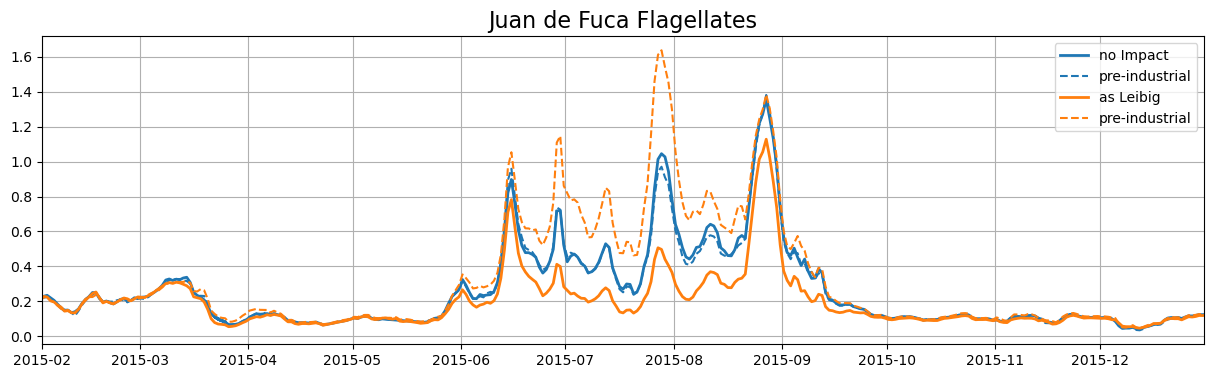

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
blue, = ax.plot(times_noI, flagellates_noI, '-', c='tab:blue', linewidth=2)
bluedsh, = ax.plot(times_PI_noI, flagellates_PI_noI, '--', c='tab:blue')
orange, = ax.plot(times_Lb80, flagellates_Lb80, '-', c='tab:orange', linewidth=2)
orangedsh, = ax.plot(times_PI_Lb80, flagellates_PI_Lb80, '--', c='tab:orange')
#green, = ax.plot(times_wC90, flagellates_wC90, '-', c='tab:green', linewidth=2)
#greendsh, = ax.plot(times_PI_wC90, flagellates_PI_wC90, '--', c='tab:green')
ax.legend([blue, bluedsh,orange, orangedsh], 
          ["no Impact", 'pre-industrial',"as Leibig", 'pre-industrial']);
ax.set_xlim((dt.datetime(2015, 2, 1), dt.datetime(2015, 12, 31)))
ax.grid();
ax.set_title('Juan de Fuca Flagellates',fontsize=16)